In [65]:
#                                                     بسم الله الرحمن الرحيم                                                 
#  program: KickStart.cpp 
#  Description: Student Performance Insights Challenge DEPI X EYOUTH
#  Author:  Abdallah Gasem
#  Contact: ag.ellsayed@gmail.com   
#  last modified: 27-02-2025
#  Version: 1.0

# **Student Performance and Behaviour Analysis**

#### This notebook aims to analyze student performance data to uncover valuable insights that can contribute to improving academic outcomes. The process involves data cleaning, trend analysis, visualization, and deriving actionable insights to better understand the factors influencing student success.


### <-table of contents to be added here->

In [1]:
# Gearing Up!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)  # show all the columns

studs_data = pd.read_csv(r"E:\DEPI\Technical\DEPI\Eyouth-Challenge\Student-Performance-Analysis\Dataset\Students_Grading_Dataset.csv")
studs_df = pd.DataFrame(studs_data)

studs_df  # testing


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,NaN,88.08,2.79,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


## **1. Data Exploration**

<p><b>Metadata</b></p>
<table style="width:45%; float:left; margin-right:5%;">
    <thead>
        <tr>
            <th>Column</th>
            <th>Type</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Student_ID</td>
            <td>String</td>
            <td>Unique identifier for each student</td>
        </tr>
        <tr>
            <td>First_Name</td>
            <td>String</td>
            <td>Student’s first name</td>
        </tr>
        <tr>
            <td>Last_Name</td>
            <td>String</td>
            <td>Student’s last name</td>
        </tr>
        <tr>
            <td>Email</td>
            <td>String</td>
            <td>Contact email (can be anonymized)</td>
        </tr>
        <tr>
            <td>Gender</td>
            <td>Categorical</td>
            <td>Male, Female, Other</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>Integer</td>
            <td>Age of the student</td>
        </tr>
        <tr>
            <td>Department</td>
            <td>String</td>
            <td>Student's department (e.g., CS, Engineering, Business)</td>
        </tr>
        <tr>
            <td>Attendance (%)</td>
            <td>Float</td>
            <td>Attendance percentage (0-100%)</td>
        </tr>
        <tr>
            <td>Midterm_Score</td>
            <td>Float</td>
            <td>Midterm exam score (out of 100)</td>
        </tr>
        <tr>
            <td>Final_Score</td>
            <td>Float</td>
            <td>Final exam score (out of 100)</td>
        </tr>
        <tr>
            <td>Assignments_Avg</td>
            <td>Float</td>
            <td>Average score of all assignments (out of 100)</td>
        </tr>
        <tr>
            <td>Quizzes_Avg</td>
            <td>Float</td>
            <td>Average quiz scores (out of 100)</td>
        </tr>
    </tbody>
</table>

<table style="width:45%; float:left;">
    <thead>
        <tr>
            <th>Column</th>
            <th>Type</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Participation_Score</td>
            <td>Float</td>
            <td>Score based on class participation (0-10)</td>
        </tr>
        <tr>
            <td>Projects_Score</td>
            <td>Float</td>
            <td>Project evaluation score (out of 100)</td>
        </tr>
        <tr>
            <td>Total_Score</td>
            <td>Float</td>
            <td>Weighted sum of all grades</td>
        </tr>
        <tr>
            <td>Grade</td>
            <td>Categorical</td>
            <td>Letter grade (A, B, C, D, F)</td>
        </tr>
        <tr>
            <td>Study_Hours_per_Week</td>
            <td>Float</td>
            <td>Average study hours per week</td>
        </tr>
        <tr>
            <td>Extracurricular_Activities</td>
            <td>Boolean</td>
            <td>Whether the student participates in extracurriculars (Yes/No)</td>
        </tr>
        <tr>
            <td>Internet_Access_at_Home</td>
            <td>Boolean</td>
            <td>Does the student have access to the internet at home? (Yes/No)</td>
        </tr>
        <tr>
            <td>Parent_Education_Level</td>
            <td>Categorical</td>
            <td>Highest education level of parents (None, High School, Bachelor's, Master's, PhD)</td>
        </tr>
        <tr>
            <td>Family_Income_Level</td>
            <td>Categorical</td>
            <td>Low, Medium, High</td>
        </tr>
        <tr>
            <td>Stress_Level (1-10)</td>
            <td>Integer</td>
            <td>Self-reported stress level (1: Low, 10: High)</td>
        </tr>
        <tr>
            <td>Sleep_Hours_per_Night</td>
            <td>Float</td>
            <td>Average hours of sleep per night</td>
        </tr>
    </tbody>
</table>


##### 📌 **Initial Observation:** At first glance, the Email & Student Id columns does not contribute to the analysis and can be considered for removal in the data cleaning phase. Additionally, the First_Name and Last_Name columns could be combined into a single Name column to reduce redundancy

In [2]:
studs_df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

### **1.1 General Feel**

In [3]:
studs_df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [4]:
studs_df.describe(include="all")

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000,5000,5000,5000,5000,5000.000000,5000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000,5000,3206,5000,5000.00000,5000.000000
unique,5000,8,6,5000,2,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,2,2,4,3,NaN,NaN
top,S1000,Maria,Johnson,student0@university.com,Male,NaN,CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,No,Yes,PhD,Low,NaN,NaN
freq,1,657,868,1,2551,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1495,NaN,3493,4485,820,1983,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,21.048400,NaN,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,NaN,17.658860,NaN,NaN,NaN,NaN,5.48080,6.488140
std,NaN,NaN,NaN,NaN,NaN,1.989786,NaN,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,NaN,7.275864,NaN,NaN,NaN,NaN,2.86155,1.452283
min,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,NaN,5.000000,NaN,NaN,NaN,NaN,1.00000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,NaN,11.400000,NaN,NaN,NaN,NaN,3.00000,5.200000
50%,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,NaN,17.500000,NaN,NaN,NaN,NaN,5.00000,6.500000
75%,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,NaN,24.100000,NaN,NaN,NaN,NaN,8.00000,7.700000


### **1.2 Identfying Missing values & Duplicates**

#### **1.2.1 Missing Values**

##### 📌 **Initial Observation:** the Attendance (%) column got 516 (10.32%) missing values , the Assignments_Avg column got 517 (10.34%) missing values and Parent_Education_Level got 1794 (35.88%) missing values! which raise the following questions

- Is there a pattern in the missing values?
- Are the missing values concentrated in a specific grade level, school, or demographic group?
- Why might these data be missing?
- Should missing data points be imputed, or does it indicate an important trend?
- Does missing attendance correlate with lower academic performance or other factors?
- Should we assume zero attendance for missing values, or is a different approach needed?
- in case of Parent_Education_Level Should we introduce a category like "Unknown" or "Not Reported"?
- is the missing values for Attendence (%) and Assignments_Avg belong to the same students? 
- are these missing values across all the three columns intersect? or distinct?

Note: The high percentage of missing values in case of Parent_Education_Level suggests that this information may be optional or sensitive. Further analysis is needed!

In [5]:
studs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [6]:
print(studs_df.isna().sum())
print(studs_df.shape)

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64
(5000, 23)


In [7]:
# the percentage of missing values for each feature
(studs_df.isna().sum() / 5000) * 100

Student_ID                     0.00
First_Name                     0.00
Last_Name                      0.00
Email                          0.00
Gender                         0.00
Age                            0.00
Department                     0.00
Attendance (%)                10.32
Midterm_Score                  0.00
Final_Score                    0.00
Assignments_Avg               10.34
Quizzes_Avg                    0.00
Participation_Score            0.00
Projects_Score                 0.00
Total_Score                    0.00
Grade                          0.00
Study_Hours_per_Week           0.00
Extracurricular_Activities     0.00
Internet_Access_at_Home        0.00
Parent_Education_Level        35.88
Family_Income_Level            0.00
Stress_Level (1-10)            0.00
Sleep_Hours_per_Night          0.00
dtype: float64

In [ ]:
# Calculate correlation
studs_df[["Attendance (%)", "Assignments_Avg"]].corr()

,Attendance (%),Assignments_Avg
Attendance (%),1.000000,-0.037872
Assignments_Avg,-0.037872,1.000000


#### **1.2.2 Duplicates**

##### 📌 **Initial Observation:** zero duplicate rows in the dataset

In [9]:
studs_df.duplicated().sum()

np.int64(0)

### **1.3 Data Distrbution**

#### **1.3.1 Numerical Data**

##### 📌 **Initial Observation:** observed that the data is well distributed within its minimum and maximum values, suggesting a natural spread without extreme deviations. While this indicates a lower likelihood of significant outliers, further statistical analysis (e.g., box plots or z-scores) will help confirm their presence

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attendance (%)'}>,
        <Axes: title={'center': 'Midterm_Score'}>],
       [<Axes: title={'center': 'Final_Score'}>,
        <Axes: title={'center': 'Assignments_Avg'}>,
        <Axes: title={'center': 'Quizzes_Avg'}>],
       [<Axes: title={'center': 'Participation_Score'}>,
        <Axes: title={'center': 'Projects_Score'}>,
        <Axes: title={'center': 'Total_Score'}>]], dtype=object)

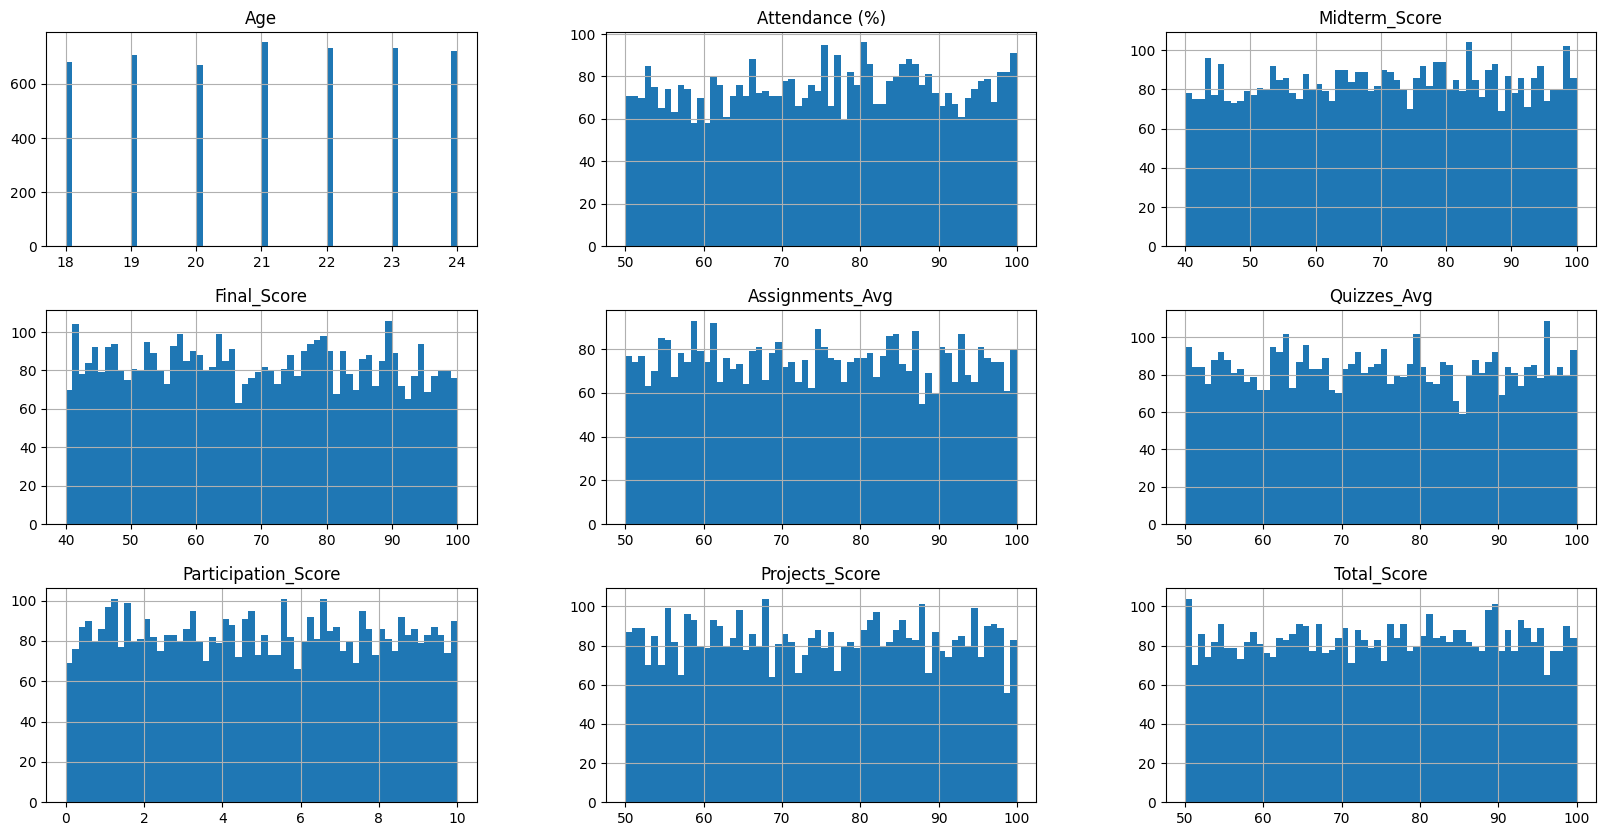

In [10]:
# Numericals Distrbutions
studs_df_nums = studs_df.loc[:,['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score']]

studs_df_nums.hist(bins=60, figsize=(20,10))

##### 📌 **Initial Observation:** student-reported stress levels reveals that 59.3% of students selected a stress level between 5 and 10, indicating that a majority experience moderate to high stress. This suggests that stress management may be a key factor influencing student performance and well-being

Stress_Level (1-10)
1     489
2     504
3     509
4     533
5     495
6     481
7     489
8     524
9     488
10    488
Name: count, dtype: int64


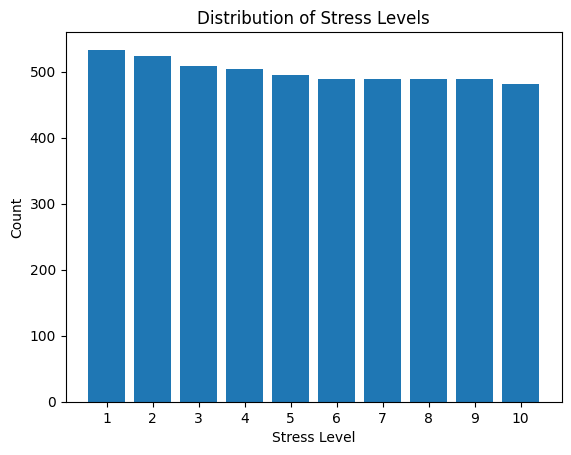

In [11]:
# other features 
print(studs_df["Stress_Level (1-10)"].value_counts().sort_index())

stress_lvl = [1,2,3,4,5,6,7,8,9,10]

plt.bar(stress_lvl, studs_df["Stress_Level (1-10)"].value_counts(), tick_label=stress_lvl)
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Distribution of Stress Levels')
plt.show()

#### **1.3.2 Categorical Data**

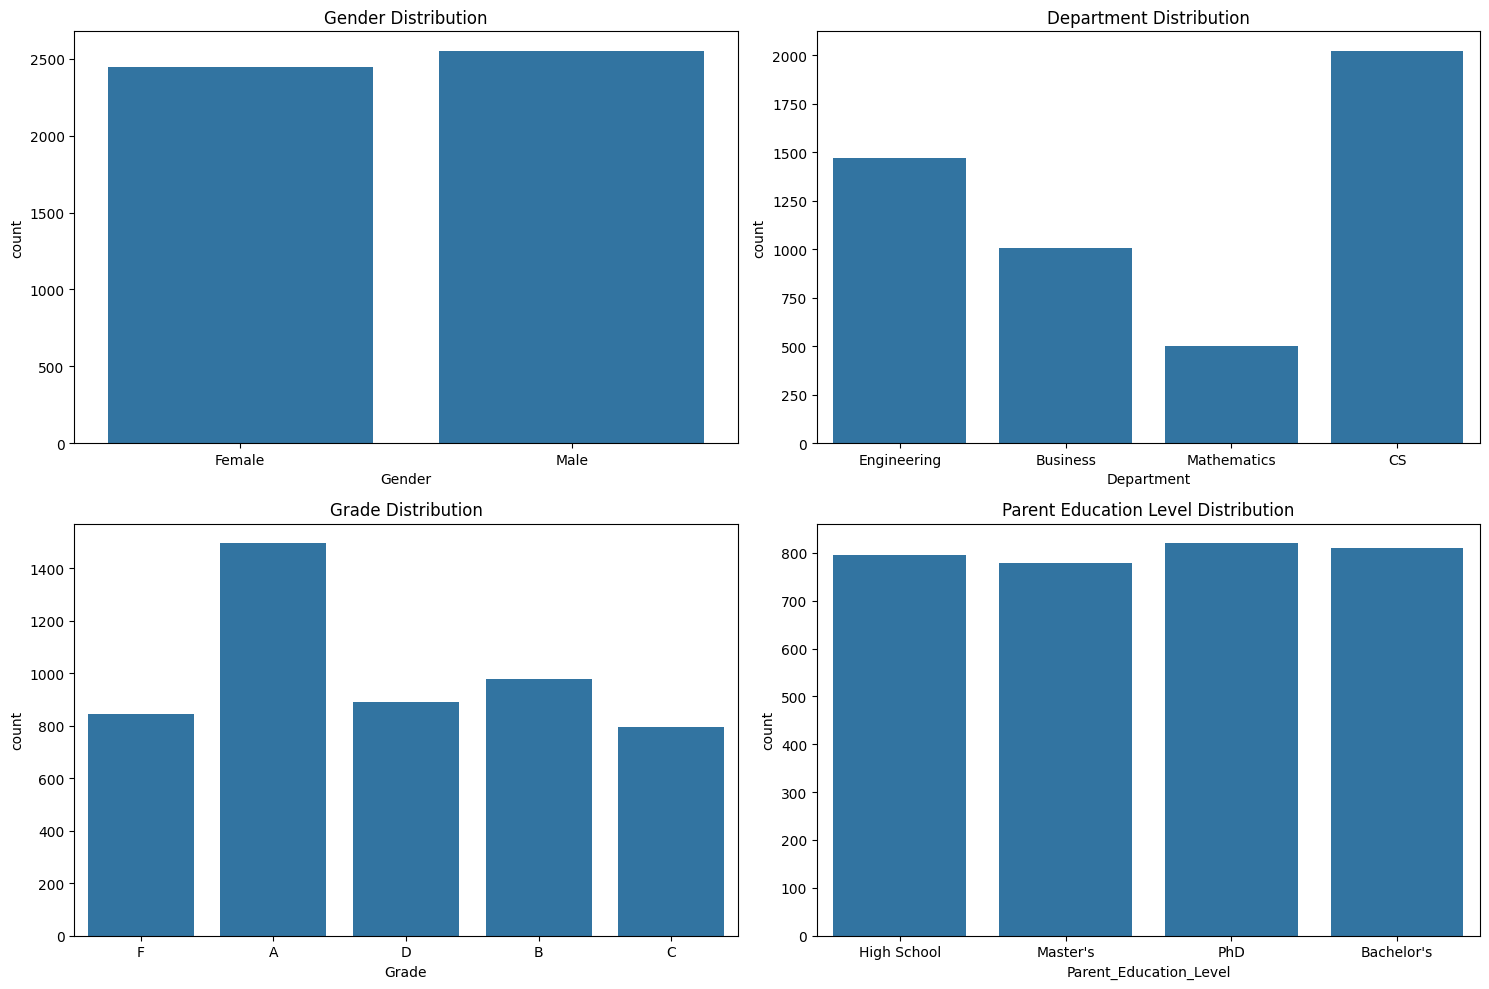

In [12]:
# Categorical Data
studs_df_cats = studs_df.loc[:,['Gender', 
       'Department','Grade', 'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level']]

# Plotting categorical data using bar plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(ax=axes[0, 0], x='Gender', data=studs_df_cats)
axes[0, 0].set_title('Gender Distribution')

sns.countplot(ax=axes[0, 1], x='Department', data=studs_df_cats)
axes[0, 1].set_title('Department Distribution')

sns.countplot(ax=axes[1, 0], x='Grade', data=studs_df_cats)
axes[1, 0].set_title('Grade Distribution')

sns.countplot(ax=axes[1, 1], x='Parent_Education_Level', data=studs_df_cats)
axes[1, 1].set_title('Parent Education Level Distribution')

plt.tight_layout()
plt.show()

#### **1.3.3 Boolean Data**

##### 📌 69.96% of the students Does not Participate in any Extracurricular Activities. And there are about 515 student that do not have any internet access at their homes so they would require a special attention when evaluating their performance

In [13]:
studs_df_bools = studs_df[["Extracurricular_Activities", "Internet_Access_at_Home"]]
studs_df_bools.apply(pd.Series.value_counts)

,Extracurricular_Activities,Internet_Access_at_Home
No,3493,515
Yes,1507,4485


## **2. Data Cleaning**

### **2.1 Columns Manipulation**

##### 📌 we did observe while exploring the data that the Email & Student_ID columns does not contribute to the analysis and can be considered for removal in the data cleaning phase. we did also mention that  the First_Name and Last_Name columns could be combined into a single Name column to reduce redundancy so thats what we are gonna do:
- Remove the columns that are unrevelant to the Analysis `Email` & `Student_ID`
- Combine First and Last Name into a New Column Called `Name` and remove the 2 columns

In [14]:
# Drop the Useless Cols
studs_df_cleaning = studs_df.drop(columns=["Student_ID","Email"], axis=1)

# Combine First_Name and Last_Name into a column called 'Name' then removing the 2 cols
studs_df_cleaning["Name"] =  studs_df_cleaning["First_Name"] +" "+studs_df_cleaning["Last_Name"]

# removing the First_Name & Last_Name Cols to reduce Redunduncy
studs_df_cleaning.drop(columns=["First_Name","Last_Name"], inplace=True)
studs_df_cleaning

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Name
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7,Omar Williams
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0,Maria Brown
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2,Ahmed Jones
3,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7,Omar Williams
4,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1,John Smith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3,Ahmed Jones
4996,Male,19,Business,65.11,86.31,49.80,NaN,88.08,2.79,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0,Emma Brown
4997,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3,John Brown
4998,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4,Sara Davis


##### 🔍 **Observation:** There are Some data that are not so logical like assigning A "male" To "Maria Brown" at the 2nd row and "Female" to "Omar Williams" in the 1st row! this is repeated across all the data point. Needs Further Investegation Weather To remove these cols Or leave them anyways they wont provide significant Contribution to our Analysis.

#### 💡 **Action:** we are going to drop these columns because they are identifiers & They don’t hold numerical or categorical significance 

In [15]:
studs_df_cleaning.drop(columns = "Name", inplace=True)
studs_df_cleaning

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,Male,19,Business,65.11,86.31,49.80,NaN,88.08,2.79,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


### **2.2 Handling Missing Values**

##### 📌 We did observe that we have Missing Values in 'Attendance (%)' by 10.32%, Assignments_Avg by 10.34% and Parent_Education_Level by 32.88%. So now we are going to take actions regarding these Values

#### **2.2.1 Handling Missing Values For Parent_Education_Level**

##### 🔍 Examining the Null Records

In [16]:
studs_df_PEL_na = studs_df_cleaning[studs_df_cleaning["Parent_Education_Level"].isna()]
studs_df_PEL_na

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
6,Male,24,Business,57.60,66.26,89.07,84.52,98.40,2.30,93.65,83.21,F,21.3,No,Yes,NaN,Low,5,6.4
7,Male,19,Engineering,51.91,45.67,73.96,80.12,95.90,3.73,93.24,81.93,F,27.3,Yes,No,NaN,Medium,4,4.3
9,Female,22,Engineering,64.01,87.96,98.47,96.98,55.63,5.88,78.60,84.99,A,9.6,No,Yes,NaN,Medium,10,6.4
13,Male,18,Business,96.61,40.64,93.14,66.78,56.82,4.37,81.48,77.93,A,22.8,No,Yes,NaN,Medium,10,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,Female,19,Engineering,NaN,59.39,80.37,58.01,97.43,2.83,96.74,63.42,A,13.5,No,Yes,NaN,Low,5,6.4
4990,Male,24,CS,80.53,87.83,43.70,69.29,69.46,1.84,65.16,81.18,F,15.2,No,Yes,NaN,Low,7,7.1
4991,Female,20,Engineering,55.54,59.68,63.09,NaN,56.92,2.32,81.30,89.55,D,18.8,Yes,Yes,NaN,Low,5,6.8
4993,Female,22,Business,99.21,60.16,59.18,59.74,63.01,2.70,69.56,85.86,A,16.9,No,Yes,NaN,Low,2,7.8


##### 🔍 As iam trying to find a pattern Between these Missing Values we would Notice that these missing values are not associated with a specific Income Rate for example the Lower Income Category therefore, These data Could Be Missing at Random Or Randomly Missing. Since income level doesn't explain the missing values, it's unlikely that imputing based on income would be a good strategy.

In [17]:
studs_df_PEL_na["Family_Income_Level"].value_counts()

Family_Income_Level
Low       729
Medium    687
High      378
Name: count, dtype: int64

##### 💡 **Acion:** we are going to introduce a new Category "Not Provided" because the missingness isn’t concentrated in one income group, meaning it doesn’t introduce bias toward any specific economic class.

In [18]:
studs_df_cleaning["Parent_Education_Level"].fillna("Not Provided", inplace=True)

C:\Users\Click\AppData\Local\Temp\ipykernel_1312\2934135130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  studs_df_cleaning["Parent_Education_Level"].fillna("Not Provided", inplace=True)


#### **2.2.2 Handling Missing Values For Assignments_Avg**

##### 🔍 Examining the Null Records

In [19]:
studs_df_AssignAvg_na = studs_df_cleaning[studs_df_cleaning["Assignments_Avg"].isna()]
studs_df_AssignAvg_na

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Not Provided,Medium,4,9.0
20,Male,18,CS,77.13,69.94,46.70,NaN,84.38,7.72,74.07,88.47,D,16.9,No,Yes,High School,Medium,2,8.1
55,Female,19,Business,81.75,52.50,50.77,NaN,97.27,7.79,81.44,88.76,A,5.1,No,Yes,Not Provided,Medium,2,7.4
61,Male,19,CS,82.34,94.72,93.70,NaN,79.49,6.06,57.93,88.60,B,22.0,No,Yes,Not Provided,Low,3,4.8
76,Female,21,Engineering,70.77,70.22,66.31,NaN,62.41,5.81,56.51,58.85,A,26.7,No,Yes,Not Provided,High,1,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,Male,19,CS,93.16,85.05,99.24,NaN,80.59,9.33,74.52,54.35,B,10.6,No,Yes,Master's,Medium,7,5.2
4985,Female,18,CS,51.41,81.72,71.21,NaN,66.87,1.08,79.30,70.75,D,25.2,No,Yes,Bachelor's,High,6,4.2
4991,Female,20,Engineering,55.54,59.68,63.09,NaN,56.92,2.32,81.30,89.55,D,18.8,Yes,Yes,Not Provided,Low,5,6.8
4992,Male,18,CS,NaN,61.44,64.59,NaN,50.11,3.53,80.08,62.51,A,23.3,Yes,No,High School,Medium,1,6.2


##### 🔍 Analyzing the Correlation of Assignments_Avg with the Other numerical features to decide what type of Imputation should we go with. the Correlation Analysis shows weak realationship between Assignments_Avg and other Numericals, the highest Correlation was `Study_Hours_per_Week 0.022166` which still which is still extremely weak.

In [51]:
numerical_features = ['Age','Assignments_Avg', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
correlation = studs_df_cleaning[numerical_features].corr()
correlation['Assignments_Avg']

Age                     -0.031416
Assignments_Avg          1.000000
Attendance (%)          -0.035833
Midterm_Score           -0.006988
Final_Score              0.010039
Quizzes_Avg              0.006874
Participation_Score      0.013179
Projects_Score           0.006641
Total_Score              0.000468
Study_Hours_per_Week     0.022166
Stress_Level (1-10)      0.010867
Sleep_Hours_per_Night    0.017538
Name: Assignments_Avg, dtype: float64

##### 💡 **Action:** we can impute this values using statistical methods either the mean or the median but iam gonna go with the `median` as it is will be more safer (Insenstive) regarding outliers (although we are not expecting Extreme values from what we saw in the initial Observations)

In [56]:
studs_df_cleaning.fillna({"Assignments_Avg": studs_df_cleaning["Assignments_Avg"].median()}, inplace=True)
studs_df_cleaning

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.27,97.23,45.80,74.69,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Not Provided,Medium,4,9.0
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,Male,19,Business,65.11,86.31,49.80,74.69,88.08,2.79,60.87,95.96,C,5.0,No,Yes,Not Provided,Medium,4,4.0
4997,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


#### **2.2.3 Handling Missing Values For Attendence (%)**

##### 📌 Taking the same approach we did with the Assignments_Avg 

##### 🔍 Examining the Null Records

In [57]:
studs_df_Att_na = studs_df_cleaning[studs_df_cleaning["Attendance (%)"].isna()]
studs_df_Att_na

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
5,Male,21,Engineering,NaN,78.85,43.53,71.40,52.20,6.38,67.29,62.08,B,8.5,Yes,Yes,PhD,High,1,5.0
32,Female,21,CS,NaN,61.59,98.60,93.06,61.09,8.21,55.65,51.99,D,28.9,No,Yes,Not Provided,Medium,9,4.4
46,Male,24,CS,NaN,69.91,44.14,77.41,87.63,1.98,96.58,82.90,C,13.5,No,Yes,Master's,Low,5,8.6
54,Male,19,Business,NaN,52.45,85.21,93.65,61.64,8.66,92.48,82.55,B,5.3,No,Yes,High School,Medium,8,6.8
81,Female,23,CS,NaN,87.98,42.12,70.51,55.98,1.61,77.46,72.43,D,10.8,No,Yes,Master's,Low,1,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Female,22,CS,NaN,86.92,50.88,80.27,99.86,9.89,95.62,52.59,F,14.1,No,Yes,Master's,Low,8,7.5
4988,Female,19,Engineering,NaN,59.39,80.37,58.01,97.43,2.83,96.74,63.42,A,13.5,No,Yes,Not Provided,Low,5,6.4
4992,Male,18,CS,NaN,61.44,64.59,74.69,50.11,3.53,80.08,62.51,A,23.3,Yes,No,High School,Medium,1,6.2
4994,Female,19,Mathematics,NaN,69.92,55.48,75.26,54.36,8.03,64.36,55.88,F,25.5,No,Yes,High School,Low,2,4.1


##### 🔍 Correlation Analysis for Attendence Shows weak realationship between Attendence (%) and other Numericals, the highest Correlation was `Sleep_Hours_per_Night  -0.036312` which still which is still extremely weak.

In [58]:
numerical_features = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
correlation = studs_df_cleaning[numerical_features].corr()
correlation['Attendance (%)']

Age                      0.009514
Attendance (%)           1.000000
Midterm_Score           -0.007588
Final_Score             -0.025424
Quizzes_Avg             -0.029042
Participation_Score     -0.029839
Projects_Score          -0.013337
Total_Score             -0.019524
Study_Hours_per_Week     0.016311
Stress_Level (1-10)      0.012161
Sleep_Hours_per_Night   -0.036312
Name: Attendance (%), dtype: float64

##### 💡 **Action:** we are going to impute this values using the `Median`

In [61]:
studs_df_cleaning.fillna({"Attendance (%)": studs_df_cleaning["Attendance (%)"].median() }, inplace=True)
studs_df_cleaning

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.290,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.270,97.23,45.80,74.69,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Not Provided,Medium,4,9.0
2,Male,24,Business,57.190,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.150,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.180,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,Business,75.725,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,Male,19,Business,65.110,86.31,49.80,74.69,88.08,2.79,60.87,95.96,C,5.0,No,Yes,Not Provided,Medium,4,4.0
4997,Female,24,CS,87.540,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,Male,23,CS,92.560,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


In [62]:
studs_df_cleaning.isna().sum()

Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

#### Now we have Zero Missing Values in the Data we are going to the next step which is `Handling Outliers`!

### **2.3 Handling Outliers**

In [64]:
studs_df_cleaning

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.290,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.270,97.23,45.80,74.69,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Not Provided,Medium,4,9.0
2,Male,24,Business,57.190,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.150,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.180,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,Business,75.725,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,Male,19,Business,65.110,86.31,49.80,74.69,88.08,2.79,60.87,95.96,C,5.0,No,Yes,Not Provided,Medium,4,4.0
4997,Female,24,CS,87.540,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,Male,23,CS,92.560,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


## **3. Feature Engineering**

In [ ]:
# studs_df_PEL_subset = studs_df_cleaning

# # creating a new feature as a numerical standing for the Parent_Education_Level to see correlation with other features
# PEL_mask = {
#     "Not Provided": 0,
#     "High School" : 1,
#     "Bachelor's" : 2,
#     "Master's" : 3,
#     "PhD" : 4,
# }

# gen_mask = {
#     "Male": 0,
#     "Female": 1
# }

# FIL_mask = {
#     "Low": 1,
#     "Medium": 2,
#     "High": 3
# }


# studs_df_PEL_subset["Num_PEL"] = studs_df_PEL_subset["Parent_Education_Level"].map(PEL_mask)
# studs_df_PEL_subset["Num_Gen"] = studs_df_PEL_subset["Gender"].map(gen_mask)
# studs_df_PEL_subset["Num_FIL"] = studs_df_PEL_subset["Family_Income_Level"].map(FIL_mask)

# studs_df_PEL_subset